## Loading data

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

import os
import zipfile

local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

--2024-11-01 21:35:07--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.179.207, 64.233.180.207, 142.251.16.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.179.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   162MB/s    in 0.4s    

2024-11-01 21:35:07 (162 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



## Reading the Data into arrays

In [ ]:
from PIL import Image
import numpy as np

NUMBER_OF_EXAMPLES = 2000
x_train = []
y_train = []
cats_dir = os.path.join(train_dir + "/cats")
dogs_dir = os.path.join(train_dir + "/dogs")
i = 0
while i < NUMBER_OF_EXAMPLES:
  if i % 2 == 0:
    im_resized = Image.open(os.path.join(cats_dir, os.listdir(cats_dir)[i // 2])).convert("RGB")

    x_train.append(np.array(im_resized))
    y_train.append(1)
  else:
    im_resized = Image.open(os.path.join(dogs_dir, os.listdir(dogs_dir)[i // 2])).convert("RGB")

    x_train.append(np.array(im_resized))
    y_train.append(0)
  i += 1

## Beginning to define the model (this is where you come in, I loaded the pretrained model for you)

In [ ]:
import tensorflow as tf

pretrained_model = tf.keras.applications.ResNet50(
    include_top=False,
    input_shape=(150, 150, 3),
    pooling='avg',
    classes=2,
    weights='imagenet'
)
for layer in pretrained_model.layers:
  layer.trainable = False
resnet_model = tf.keras.models.Sequential()
resnet_model.add(pretrained_model)
resnet_model.add(tf.keras.layers.Flatten())
resnet_model.add(tf.keras.layers.Dense(512, activation = "relu"))
resnet_model.add(tf.keras.layers.Dense(2, activation = "sigmoid"))

In [ ]:
resnet_model.compile(optimizer = tf.keras.optimizers.Adam(learning_rate = 0.001), loss = "binary_crossentropy", metrics = ["accuracy"])

In [ ]:
# train_ds = [(x_train[j], y_train[j]) for j in range(len(x_train))]
# cats_test = os.path.join(validation_dir + "/cats")
# dogs_test = os.path.join(validation_dir + "/dogs")
# x_test = []
# y_test = []
# k = 0
# while k < 1000:
#   if k % 2 == 0:
#     im_resized = Image.open(os.path.join(cats_test, os.listdir(cats_test)[k // 2])).convert("RGB")

#     x_test.append(np.array(im_resized))
#     y_test.append(1)
#   else:
#     im_resized = Image.open(os.path.join(dogs_test, os.listdir(dogs_test)[k // 2])).convert("RGB")

#     x_test.append(np.array(im_resized))
#     y_test.append(0)
#   k += 1
# val_ds = [(x_test[m], y_test[m]) for m in range(len(x_test))]
img_height, img_width = 150, 150
batch_size = 32
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    seed = 42,
    label_mode = "categorical",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 2000 files belonging to 2 classes.


In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    validation_dir,
    seed = 42,
    label_mode = "categorical",
    image_size = (img_height, img_width),
    batch_size = batch_size
)

Found 1000 files belonging to 2 classes.


In [37]:
epochs = 10
history = resnet_model.fit(
    train_ds,
    validation_data = val_ds,
    epochs = epochs
)

Epoch 1/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 245s 4s/step - accuracy: 0.8402 - loss: 0.5167 - val_accuracy: 0.9530 - val_loss: 0.1213
Epoch 2/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 254s 4s/step - accuracy: 0.9579 - loss: 0.0986 - val_accuracy: 0.9560 - val_loss: 0.1104
Epoch 3/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 262s 4s/step - accuracy: 0.9825 - loss: 0.0498 - val_accuracy: 0.9550 - val_loss: 0.1158
Epoch 4/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 233s 4s/step - accuracy: 0.9964 - loss: 0.0226 - val_accuracy: 0.9550 - val_loss: 0.1385
Epoch 5/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 253s 4s/step - accuracy: 0.9870 - loss: 0.0333 - val_accuracy: 0.9500 - val_loss: 0.1448
Epoch 6/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 261s 4s/step - accuracy: 0.9992 - loss: 0.0082 - val_accuracy: 0.9590 - val_loss: 0.1389
Epoch 7/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 265s 4s/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 0.9560 - val_loss: 0.1519
Epoch 8/10
63/63 ━━━━━━━━━━━━━━━━━━━━ 261s 4s/step - accuracy: 1.0000 - loss: 0.0017 - val_accuracy: 0.9590 - v

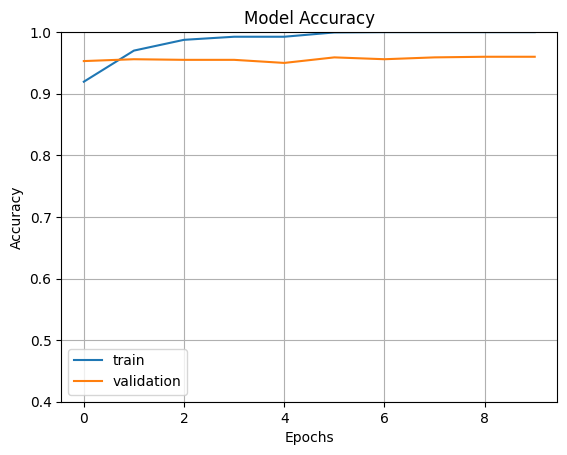

In [38]:
import matplotlib.pyplot as plt

fig1 = plt.gcf()
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])
plt.axis(ymin = 0.4, ymax = 1)
plt.grid()
plt.title("Model Accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epochs")
plt.legend(["train", "validation"])
plt.show()

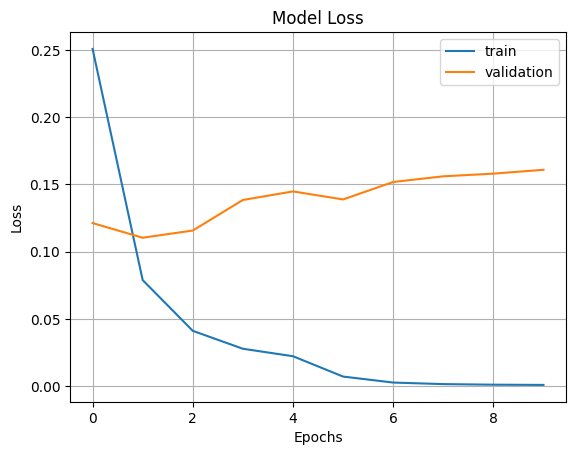

In [39]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.grid()
plt.title("Model Loss")
plt.ylabel("Loss")
plt.xlabel("Epochs")
plt.legend(["train", "validation"])
plt.show()